<a href="https://colab.research.google.com/github/saikailash666/python-assignment/blob/main/CNN_cifar_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
step-1: Import packages

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt

In [ ]:
step-2: About the dataset

Here we used a dataset name: cifar
It contains 60000 images and 10 classes
Each class containes 6000 images

Data set is divided into two parts training images: 50,000

testing images: 10,000

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images.shape
# 50000 images
# 32 is width
# 32 is height
# 3 RGB : these are colour images

(50000, 32, 32, 3)

In [ ]:
32*32*3

3072

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
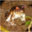

In [ ]:
train_images[0]

In [ ]:
step-3: Draw the image

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
len(datasets.cifar10.load_data())

2

In [ ]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
len(class_names)

10

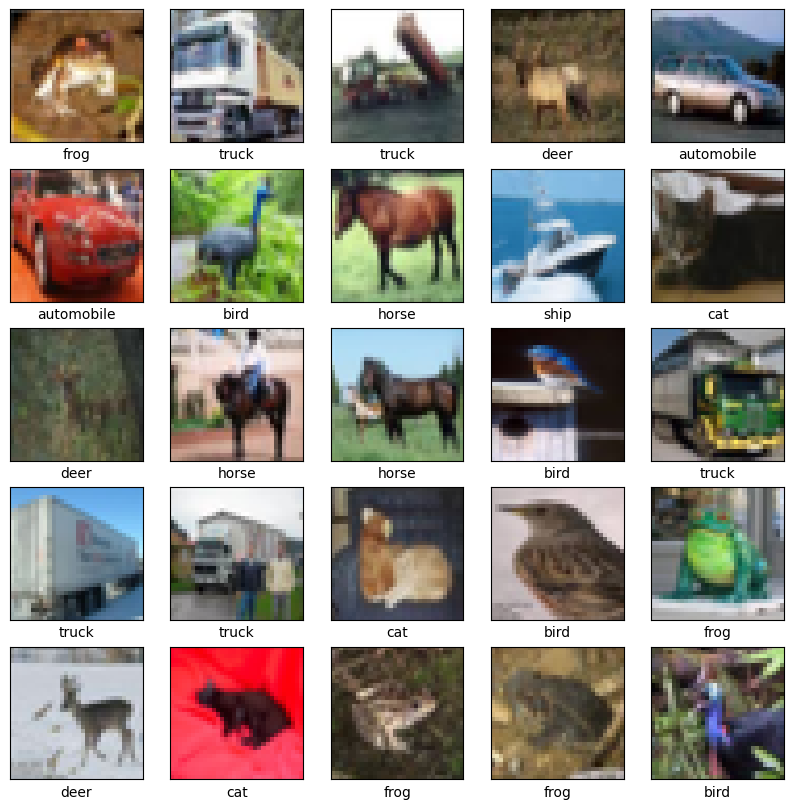

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
step-4:

Create the CNN network
     . convolution
     . Activation
     . striding(default=1) (not necessary to provide)
     . padding (not necessary to provdide)
     . pooling

In [ ]:
#model=models.Sequential()
#model.add(layers.Conv2D())

# filter is your weight    3*3*3 : 27*32=864

In [ ]:
model=models.Sequential()

#############################################################################################
model.add(layers.Conv2D(32, # filters
                        (3,3), # filter size/kernal size
                        activation='relu',
                        input_shape=(32,32,3)
                        ))  # Stride / padding : default

model.add(layers.MaxPool2D((2,2)))  # shape of the pool

###############################################################################################
model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernal size
                        activation='relu'))  # stride /padding: deafault

model.add(layers.MaxPool2D((2,2)))

###############################################################################################

model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernal size
                        activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
step-5:
Add dense layers

In [ ]:
model.add(layers.Flatten()) # after convolution = fully connect layer
model.add(layers.Dense(64,activation='relu')) # hidden layers 64 neurons, relu activation function
model.add(layers.Dense(10))  # 10 classes so 10 neurons

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
step-6: Compile the model

In [ ]:
model.compile(optimizer='adam', #optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss
              metrics=['accuracy']# metric
              )

history=model.fit(train_images,train_labels, epochs=10,
                  validation_data=(test_images,test_labels))

# 1 epoch= one forward pass + one backward pass

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.8447 - accuracy: 0.3777 - val_loss: 1.4202 - val_accuracy: 0.4916
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.2763 - accuracy: 0.5478 - val_loss: 1.2061 - val_accuracy: 0.5759
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1224 - accuracy: 0.6076 - val_loss: 1.1255 - val_accuracy: 0.6064
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0204 - accuracy: 0.6433 - val_loss: 1.0545 - val_accuracy: 0.6391
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9382 - accuracy: 0.6743 - val_loss: 1.0292 - val_accuracy: 0.6427
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8791 - accuracy: 0.6953 - val_loss: 1.0130 - val_accuracy: 0.6536
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8349 - accuracy: 0.7127 - val_loss: 1.0642 -

In [ ]:
   history.history

{'loss': [1.844652533531189,
  1.2762714624404907,
  1.122439980506897,
  1.02039635181427,
  0.9382178783416748,
  0.8791098594665527,
  0.8348886966705322,
  0.7744607925415039,
  0.7308865785598755,
  0.6925430297851562],
 'accuracy': [0.37766000628471375,
  0.547760009765625,
  0.6075800061225891,
  0.6432600021362305,
  0.6742600202560425,
  0.6952599883079529,
  0.7126799821853638,
  0.7314800024032593,
  0.7466400265693665,
  0.7594199776649475],
 'val_loss': [1.4201856851577759,
  1.206121802330017,
  1.125487208366394,
  1.0544602870941162,
  1.029171109199524,
  1.0130062103271484,
  1.064229130744934,
  0.9862618446350098,
  0.9852868318557739,
  0.98516845703125],
 'val_accuracy': [0.49160000681877136,
  0.5759000182151794,
  0.6064000129699707,
  0.6391000151634216,
  0.6427000164985657,
  0.6535999774932861,
  0.6427000164985657,
  0.6777999997138977,
  0.6855000257492065,
  0.6814000010490417]}

313/313 - 4s - loss: 0.9852 - accuracy: 0.6814 - 4s/epoch - 14ms/step


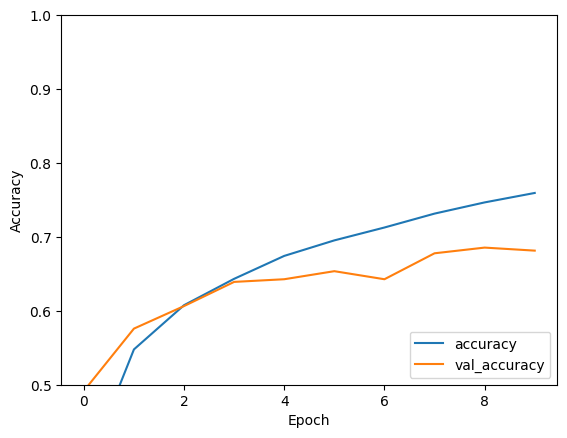

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 5.68466857e-02,  3.43328342e-03, -1.33046871e-02,
            2.60881543e-01, -5.08565605e-02, -5.85523956e-02,
            2.07449540e-01, -7.15273619e-02,  8.90870467e-02,
            9.07343179e-02, -1.48712128e-01, -4.47653942e-02,
           -7.23245218e-02,  2.91715339e-02, -6.88022971e-02,
           -7.32985958e-02,  2.44329542e-01, -2.81112362e-02,
           -2.05098033e-01,  5.22475922e-03,  4.23882268e-02,
           -1.73735440e-01,  2.55136956e-02, -1.25959426e-01,
            2.31996514e-02, -5.62686250e-02, -7.58552328e-02,
            5.28650433e-02,  1.30736381e-01, -1.46210372e-01,
            5.21057732e-02, -1.24732025e-01],
          [ 1.10844284e-01,  9.46436375e-02, -4.91570793e-02,
            1.58440918e-01,  1.71314273e-03,  9.78583694e-02,
            8.92708898e-02, -1.55799806e-01, -9.21986699e-02,
           -2.21794732e-02,  8.97634625e-02,  8.12149718e-02,
           -

In [ ]:
test_labels.flatten()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
import numpy as np
import pandas as pd

y_pred = model.predict(test_images)
max_prob=[np.max(i)  for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction_class=[class_names[i] for i in index]
Ground_Truth_class=[class_names[i] for i in test_labels.flatten()]

d1=pd.DataFrame(zip(max_prob,index,prediction_class,Ground_Truth_class),
             columns=['Max_proba','Index','Prediction_class','Ground_Truth_class'])
con=d1['Prediction_class']==d1['Ground_Truth_class']
d1['output']=np.where(con,1,0)
accuracy=d1['output'].sum()/len(d1['output'])
accuracy

313/313 [==============================] - 4s 12ms/step


0.6814

In [ ]:
d1

,Max_proba,Index,Prediction_class,Ground_Truth_class,output
0,9.783478,3,cat,cat,1
1,20.242571,8,ship,ship,1
2,7.876627,8,ship,ship,1
3,6.382410,8,ship,airplane,0
4,17.373211,6,frog,frog,1
...,...,...,...,...,...
9995,11.318441,3,cat,ship,0
9996,12.870936,6,frog,cat,0
9997,15.072749,5,dog,dog,1
9998,10.479066,4,deer,automobile,0


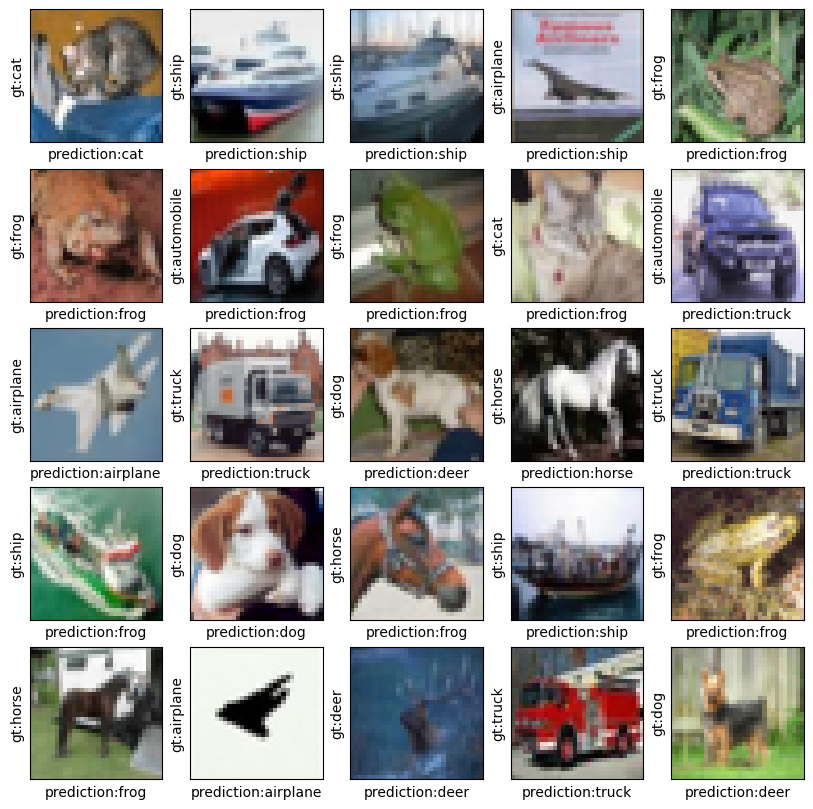

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f'prediction:{class_names[np.argmax(y_pred[i])]}')
    plt.ylabel(f'gt:{class_names[test_labels.flatten()[i]]}')
plt.show()